In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, explained_variance_score, mean_absolute_error, mean_squared_error
%matplotlib inline 

In [4]:
rdrive = '/mnt/researchdrive/BOX_INTERNAL/opotowsky/'
#mll_gam = rdrive + 'mll/gam_spec/'
#mll_nuc = rdrive + 'mll/nuc_conc/'
learn_gam = rdrive + 'scikit/gam_spec/'
learn_nuc = rdrive + 'scikit/nuc_conc/'

In [5]:
det = ['nuc29', 'act32', 'act4/9', 'd1', 'd2', 'd3', 'd6', 'd5', 'd4'] 
detdesc = ['nuc29', 'act32', 'act4/9', 'd1_hpge', 'd2_hpge', 'd3_czt', 'd6_sri2', 'd5_labr3', 'd4_nai']
pred = ['reactor', 'burnup', 'enrichment', 'cooling']
predmll = ['ReactorType', 'Burnup', 'Enrichment', 'CoolingTime']
csv_end = '_scores.csv'
# for dataframes
algcol = ['knn_auto', 'dtree_auto', 'knn31', 'dtree31', 'knn113', 'dtree113']
scrcol  = ['Accuracy', 'Acc Std']
errcol = ['Neg MAE', 'MAE Std']
# tset fracs for scikit results
tfrac007 = '_tset0.067_'
tfrac100 = '_tset1.0_'

In [14]:
#results100 = {}
#tfrac = tfrac100
#results = results100
results007 = {}
tfrac = tfrac007
results = results007
for i, p in enumerate(pred):
    if p == 'reactor':
        levels = [algcol, scrcol]
    else: 
        levels = [algcol, errcol]
    df = pd.DataFrame(index=det, columns=pd.MultiIndex.from_product(levels, names=["Algorithm", "Metric"]))
    for j, d in enumerate(det):
        learn_path = learn_gam
        knncsv = p + '_knn' + tfrac + detdesc[j] + csv_end
        dtrcsv = p + '_dtree' + tfrac + detdesc[j] + csv_end
        if 'nuc' in d or 'act' in d:
            if d == 'act4/9':
                knncsv = p + '_knn' + tfrac + 'act4' + csv_end
                dtrcsv = p + '_dtree' + tfrac + 'act4' + csv_end
                knn31 = pd.read_csv(learn_path + 'act4/' + knncsv).drop(columns='Unnamed: 0')
                dtr31 = pd.read_csv(learn_path + 'act4/' + dtrcsv).drop(columns='Unnamed: 0')
                knncsv = p + '_knn' + tfrac + 'act9' + csv_end
                dtrcsv = p + '_dtree' + tfrac + 'act9' + csv_end
                ##### applying act9 to auto, although this isn't accurate #####
                knn_auto = knn113 = pd.read_csv(learn_path + 'act9/' + knncsv).drop(columns='Unnamed: 0')
                dtr_auto = dtr113 = pd.read_csv(learn_path + 'act9/' + dtrcsv).drop(columns='Unnamed: 0')
            else:
                if 'nuc' in d:
                    learn_path = learn_nuc
                knn_auto = knn31 = knn113 = pd.read_csv(learn_path + d + '/' + knncsv).drop(columns='Unnamed: 0')
                dtr_auto = dtr31 = dtr113 = pd.read_csv(learn_path + d + '/' + dtrcsv).drop(columns='Unnamed: 0')
        else:
            knn_auto = pd.read_csv(learn_path + d + '_auto/' + knncsv).drop(columns='Unnamed: 0')
            dtr_auto = pd.read_csv(learn_path + d + '_auto/' + dtrcsv).drop(columns='Unnamed: 0')
            knn31 = pd.read_csv(learn_path + d + '_n31/' + knncsv).drop(columns='Unnamed: 0')
            dtr31 = pd.read_csv(learn_path + d + '_n31/' + dtrcsv).drop(columns='Unnamed: 0')
            knn113 = pd.read_csv(learn_path + d + '_n113/' + knncsv).drop(columns='Unnamed: 0')
            dtr113 = pd.read_csv(learn_path + d + '_n113/' + dtrcsv).drop(columns='Unnamed: 0')
        
        if p == 'reactor':
            metric = 'test_score'
            dfmetric = 'Accuracy'
            dfstd = 'Acc Std'
        else:
            metric = 'test_neg_mean_absolute_error'
            dfmetric = 'Neg MAE'
            dfstd = 'MAE Std'
        df.loc[d, ('knn_auto', dfmetric)] = knn_auto[metric].mean()
        df.loc[d, ('knn_auto', dfstd)] = knn_auto[metric].std()
        df.loc[d, ('dtree_auto', dfmetric)] = dtr_auto[metric].mean()
        df.loc[d, ('dtree_auto', dfstd)] = dtr_auto[metric].std()
        df.loc[d, ('knn113', dfmetric)] = knn113[metric].mean()
        df.loc[d, ('knn113', dfstd)] = knn113[metric].std()
        df.loc[d, ('dtree113', dfmetric)] = dtr113[metric].mean()
        df.loc[d, ('dtree113', dfstd)] = dtr113[metric].std()    
        df.loc[d, ('knn31', dfmetric)] = knn31[metric].mean()
        df.loc[d, ('knn31', dfstd)] = knn31[metric].std()
        df.loc[d, ('dtree31', dfmetric)] = dtr31[metric].mean()
        df.loc[d, ('dtree31', dfstd)] = dtr31[metric].std()
    results[p] = df

In [15]:
results100['reactor']

Algorithm  knn_auto              dtree_auto                  knn31  \
Metric     Accuracy      Acc Std   Accuracy      Acc Std  Accuracy   
nuc29      0.999781  1.03574e-05   0.999168  5.39019e-05  0.999781   
act32      0.987969  0.000526868   0.983504   0.00103797  0.987969   
act4/9     0.929926  0.000927328   0.926068   0.00137572  0.810097   
d1         0.782439  0.000815876   0.856228   0.00131221  0.878287   
d2         0.860736   0.00180816   0.851979  0.000654111  0.862447   
d3         0.788252   0.00153489   0.804291   0.00154994  0.842256   
d6         0.869905   0.00131439   0.842642  0.000992616  0.858137   
d5          0.85929   0.00081247   0.819791   0.00184981  0.856723   
d4         0.819687   0.00133403   0.778796   0.00102966  0.837817   

Algorithm                dtree31                 knn113               \
Metric         Acc Std  Accuracy      Acc Std  Accuracy      Acc Std   
nuc29      1.03574e-05  0.999168  5.39019e-05  0.999781  1.03574e-05   
act32      0.000526868  0.983504   0.00103797  0.987969  0.000526868   
act4/9      0.00174632  0.802473   0.00149009  0.929926  0.000927328   
d1         0.000308525  0.868425   0.00174584  0.874256  0.000785943   
d2         0.000726864  0.861108  0.000911478  0.852365    0.0011852   
d3          0.00115827  0.822848   0.00199548  0.840772   0.00136429   
d6          0.00147525  0.836657   0.00138869  0.858679   0.00141968   
d5          0.00124849  0.828425   0.00127902  0.858407    0.0011109   
d4          0.00164247  0.818731   0.00077151  0.840465   0.00169671   

Algorithm  dtree113               
Metric     Accuracy      Acc Std  
nuc29      0.999168  5.39019e-05  
act32      0.983504   0.00103797  
act4/9     0.926068   0.00137572  
d1         0.893469  0.000855078  
d2         0.875577   0.00127246  
d3         0.842399   0.00105009  
d6         0.860897  0.000944247  
d5         0.841655    0.0018187  
d4         0.824485  0.000908549

In [16]:
results007['reactor']

Algorithm  knn_auto             dtree_auto                 knn31              \
Metric     Accuracy     Acc Std   Accuracy     Acc Std  Accuracy     Acc Std   
nuc29      0.945133  0.00325821    0.94327   0.0054329  0.945133  0.00325821   
act32      0.940244  0.00308944   0.947866   0.0014392  0.940244  0.00308944   
act4/9     0.857622  0.00379986   0.841396  0.00415163  0.767988  0.00372321   
d1         0.726931  0.00479877   0.715583   0.0117338  0.758943  0.00433055   
d2         0.751863  0.00708756   0.728184  0.00592383  0.759858  0.00377296   
d3         0.725644  0.00415991   0.692344  0.00691401  0.755522  0.00317689   
d6         0.753963  0.00280522   0.719783  0.00533281    0.7479  0.00673216   
d5           0.7521  0.00459757   0.697358     0.00535  0.758333   0.0038089   
d4         0.736179  0.00715063   0.682656   0.0058005  0.743733  0.00243101   

Algorithm   dtree31                knn113              dtree113              
Metric     Accuracy     Acc Std  Accuracy     Acc Std  Accuracy     Acc Std  
nuc29       0.94327   0.0054329  0.945133  0.00325821   0.94327   0.0054329  
act32      0.947866   0.0014392  0.940244  0.00308944  0.947866   0.0014392  
act4/9      0.74834  0.00692728  0.857622  0.00379986  0.841396  0.00415163  
d1         0.754472  0.00665825   0.75874  0.00553346  0.766192  0.00361809  
d2         0.732724  0.00919249  0.743157  0.00310842  0.738991  0.00476518  
d3         0.709688  0.00498008  0.741091  0.00563493  0.721917  0.00402853  
d6         0.712432   0.0041461  0.748171  0.00341998  0.729031  0.00686488  
d5         0.713008  0.00406786  0.744275  0.00744044  0.719275   0.0069368  
d4         0.703625  0.00260036  0.737398  0.00312453  0.696443    0.010764

# Plotting

In [17]:
# color dict (use: colors['XColor'])
colors = {'DBrwn' : '#8c510a', 'MBrwn' : '#d8b365', 'LBrwn' : '#f6e8c3',
          'DTeal' : '#01665e', 'MTeal' : '#5ab4ac', 'LTeal' : '#c7eae5',
          'DPurp' : '#762a83', 'MPurp' : '#af8dc3', 'LPurp' : '#e7d4e8'
         }

In [21]:
def plot_curves(pred_param, title, plotdf):
    plt.clf()
    fig = plt.figure(figsize=(7,6))
    ax = fig.add_subplot(111)
    ax.set_title(title, fontsize=20, pad=15)
    ax.set_xlabel('Detector Type', fontsize=20, labelpad=15)
    if pred_param == 'reactor':
        ax.set_ylabel('Accuracy Score', fontsize=20, labelpad=15)
        metric = scrcol[0]
        std = scrcol[1]
    else:
        err = 'Negative MAE'
        if pred_param == 'burnup':
            yaxlbl = err + ' [MWd/MTU]'
        elif pred_param == 'enrichment':
            yaxlbl = err + ' [% U235]'
        else:
            yaxlbl = err + ' [days]'
        ax.set_ylabel(yaxlbl, fontsize=20, labelpad=15)
        metric = errcol[0]
        std = errcol[1]
    
    x = ['Nuc29', 'Act32', 'Act4/9', 'L/HPGe', 'P/HPGe', 'CZT', 'SrI2', 'LaBr3', 'NaI']
    c = ['DBrwn', 'DTeal', 'MBrwn', 'MTeal', 'LBrwn', 'LTeal']
    lbl = ['kNN Auto', 'Dec Tree Auto', 'kNN 31', 'Dec Tree 31', 'kNN 113', 'Dec Tree 113']
    for i, alg in enumerate(algcol):
        y = np.array(plotdf[alg][metric], dtype=float)
        sd = np.array(plotdf[alg][std], dtype=float)
        ax.plot(x, y, 'o-', color=colors[c[i]], mew=0, ms=5, label=lbl[i])
        ax.fill_between(x, y - sd, y + sd, color=colors[c[i]], alpha=0.2)
    
    ax.tick_params(labelsize=12)
    h,l = ax.get_legend_handles_labels()
    #handles = [h[5], h[2], h[3], h[0], h[4], h[1]]
    #labels = [l[5], l[2], l[3], l[0], l[4], l[1]]
    #ax.legend(handles,labels,loc='best')
    ax.legend(loc='best')
    
    #if pred_param == 'reactor':
    #    ax.set_ylim(None, top=1.08)
    #elif pred_param == 'burnup':
    #    ax.set_ylim(None, top=70)
    #elif pred_param == 'enrichment':
    #    ax.set_ylim(None, top=0.1)
    #else:
    #    ax.set_ylim(-250, top=30)
    plt.show()

<Figure size 432x288 with 0 Axes>

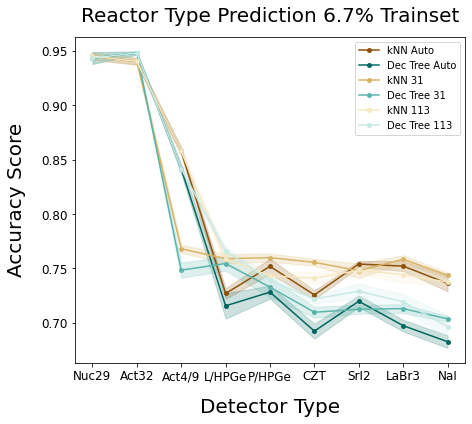

<Figure size 432x288 with 0 Axes>

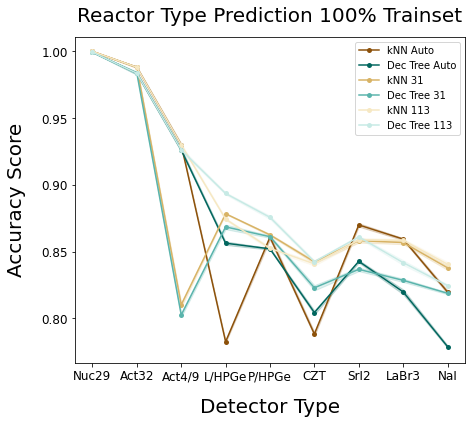

In [23]:
pred_param = 'reactor'
plot_curves(pred_param, 'Reactor Type Prediction 6.7% Trainset', results007[pred_param])
plot_curves(pred_param, 'Reactor Type Prediction 100% Trainset', results100[pred_param])

<Figure size 432x288 with 0 Axes>

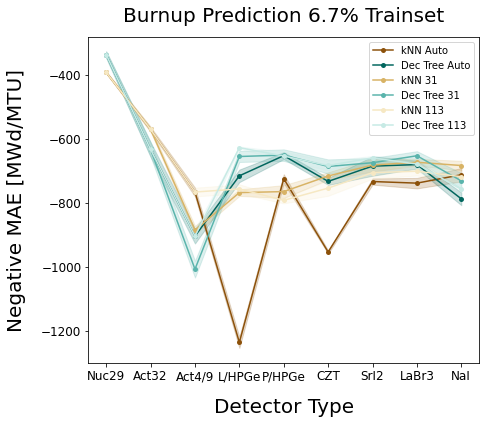

<Figure size 432x288 with 0 Axes>

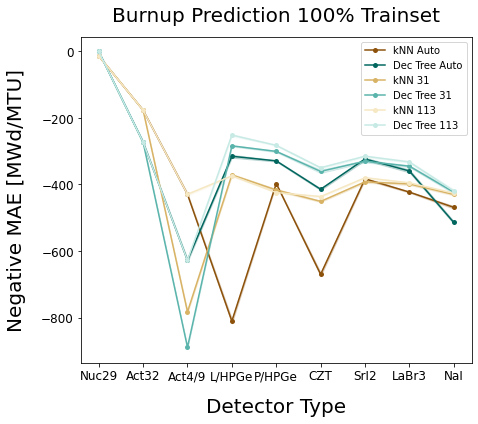

In [24]:
pred_param = 'burnup'
plot_curves(pred_param, 'Burnup Prediction 6.7% Trainset', results007[pred_param])
plot_curves(pred_param, 'Burnup Prediction 100% Trainset', results100[pred_param])

<Figure size 432x288 with 0 Axes>

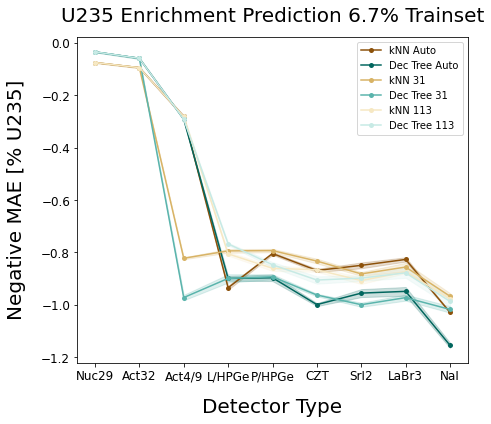

<Figure size 432x288 with 0 Axes>

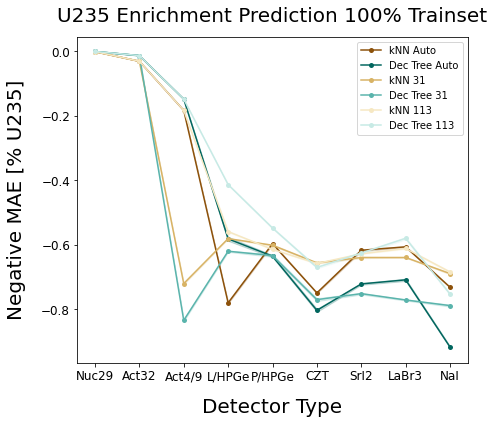

In [25]:
pred_param = 'enrichment'
plot_curves(pred_param, 'U235 Enrichment Prediction 6.7% Trainset', results007[pred_param])
plot_curves(pred_param, 'U235 Enrichment Prediction 100% Trainset', results100[pred_param])

<Figure size 432x288 with 0 Axes>

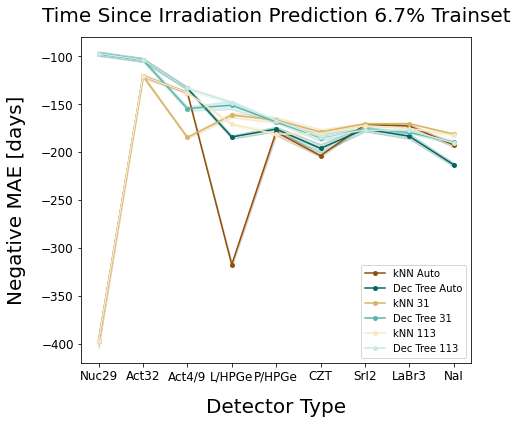

<Figure size 432x288 with 0 Axes>

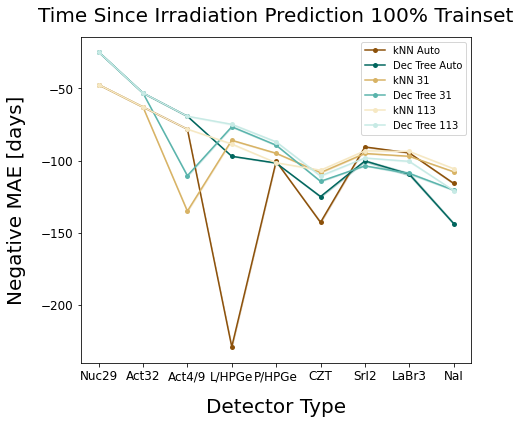

In [26]:
pred_param = 'cooling'
plot_curves(pred_param, 'Time Since Irradiation Prediction 6.7% Trainset', results007[pred_param])
plot_curves(pred_param, 'Time Since Irradiation Prediction 100% Trainset', results100[pred_param])